


---
---


**Universidade Estadual Vale do Acaraú - UVA**<br>
**Centro de Ciências Exatas e Tecnologia - CCET**<br>
**Curso:** Ciência da Computação<br>
**Disciplina:** Redes Neurais Artificiais<br>
**Professor:** Gilzamir Ferreira Gomes<br>
**Aluno(a):** Francisco Alessandro Araujo Vasconcelos<br><br>
**Classificador da Qualidade do Vinho Tinto com Rede Neural MLP**<br>
**Disponível em:** [https://github.com/AlessandroVasconcelos/Classificador-da-Qualidade-do-Vinho-Tinto-com-Rede-MLP.git](https://github.com/AlessandroVasconcelos/Classificador-da-Qualidade-do-Vinho-Tinto-com-Rede-MLP.git)

---
---

In [152]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

#lendo os conjunto de dados(dataframe)
df = pd.read_csv("https://raw.githubusercontent.com/AlessandroVasconcelos/Classificador-da-Qualidade-do-Vinho-Tinto-com-Rede-MLP/main/winequality-red.csv")
#df = pd.read_csv("winequality-red.csv")

#exibe quantidade (colunas,linhas)
#df.shape

#repetições
#repetitions = df['quality'].value_counts()

#conhecendo o conjunto de dados
df.head(20)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [153]:
"""
$quality_opinion$ > 6.5 => "1 - bom"
TRUE => "0 - ruim"
"""
#Função para adicionar a nova coluna 'quality_opinion'
def QualityLabeller(data):
    data.loc[:, 'quality_opinion'] = np.where(data.loc[:, 'quality'] > 6.5, 1, 0)
    return data

#Função para dimensionar os dados no intervalo [0, 1]
def DataScaler(data):
    scaler = MinMaxScaler()
    data = scaler.fit_transform(data)
    return data

def train_and_evaluate(x_train, y_train, x_val, y_val, x_test, y_test, learning_rate, hidden_layer_sizes, activation):
    wine_quality_classifier = MLPClassifier(
        solver='lbfgs',
        alpha=1e-5,
        learning_rate_init=learning_rate,
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        random_state=1,
        max_iter=1000
    )

    wine_quality_classifier.fit(x_train, y_train)

    accuracy_train = wine_quality_classifier.score(x_train, y_train)
    accuracy_val = wine_quality_classifier.score(x_val, y_val)
    accuracy_test = wine_quality_classifier.score(x_test, y_test)

    return accuracy_train, accuracy_val, accuracy_test

all_features = list(df) #lista com os nomes de todas as colunas
target = ['quality']
features = list(set(all_features) - set(target)) #todas as colunas - 'quality'
df.loc[:, features] = DataScaler(df.loc[:, features]) #dimensionando os dados para o intervalo [0, 1]
labelled_data = QualityLabeller(df)
target.append('quality_opinion')

# Dividindo em treino, validação e teste
train_data, test_data = train_test_split(labelled_data, test_size=0.2, random_state=42)

# Dividindo o conjunto de treino em treino e validação
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

x_train = train_data.drop(target, axis=1)
y_train = train_data.loc[:, 'quality_opinion']

x_val = val_data.drop(target, axis=1)
y_val = val_data.loc[:, 'quality_opinion']

x_test = test_data.drop(target, axis=1)
y_test = test_data.loc[:, 'quality_opinion']


In [147]:
#conhecendo conjunto de dados depois das alterações
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_opinion
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5,0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5,0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5,0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6,0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5,0
5,0.247788,0.369863,0.00,0.061644,0.105175,0.169014,0.120141,0.567548,0.606299,0.137725,0.153846,5,0
6,0.292035,0.328767,0.06,0.047945,0.095159,0.197183,0.187279,0.464758,0.440945,0.077844,0.153846,5,0
7,0.238938,0.363014,0.00,0.020548,0.088481,0.197183,0.053004,0.332599,0.511811,0.083832,0.246154,7,1
8,0.283186,0.315068,0.02,0.075342,0.101836,0.112676,0.042403,0.494126,0.488189,0.143713,0.169231,7,1
9,0.256637,0.260274,0.36,0.356164,0.098497,0.225352,0.339223,0.567548,0.480315,0.281437,0.323077,5,0


### Diferentes Configurações da Rede MLP

In [154]:
'''
- Taxa de aprendizagem
- Número de neurônios em cada camada oculta
- Número de camadas
'''

# Configuração 1
learning_rate_1 = 0.001
hidden_layer_sizes_1 = (13, 10, 5) #num_layers_1 = 3
activation_1 = 'relu'

accuracy_1_train, accuracy_1_val, accuracy_1_test = train_and_evaluate(
    x_train, y_train, x_val, y_val, x_test, y_test,
    learning_rate_1, hidden_layer_sizes_1, activation_1
)

# Configuração 2
learning_rate_2 = 0.01
hidden_layer_sizes_2 = (20, 10) #num_layers_2 = 2
activation_2 = 'relu'

accuracy_2_train, accuracy_2_val, accuracy_2_test = train_and_evaluate(
    x_train, y_train, x_val, y_val, x_test, y_test,
    learning_rate_2, hidden_layer_sizes_2, activation_2
)

# Configuração 3
learning_rate_3 = 0.005
hidden_layer_sizes_3 = (15, 15, 10) #num_layers_3 = 3
activation_3 = 'tanh'

accuracy_3_train, accuracy_3_val, accuracy_3_test = train_and_evaluate(
    x_train, y_train, x_val, y_val, x_test, y_test,
    learning_rate_3, hidden_layer_sizes_3, activation_3
)

# Configuração 4
learning_rate_4 = 0.001
hidden_layer_sizes_4 = (10,) #num_layers_4 = 1
activation_4 = 'logistic'

accuracy_4_train, accuracy_4_val, accuracy_4_test = train_and_evaluate(
    x_train, y_train, x_val, y_val, x_test, y_test,
    learning_rate_4, hidden_layer_sizes_4, activation_4
)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### Imprimindo os Resultados

In [155]:
print('='*70)
print("Accuracy for Configuration 1 - Train Set:", accuracy_1_train)
print("Accuracy for Configuration 1 - Validation Set:", accuracy_1_val)
print("Accuracy for Configuration 1 - Test Set:", accuracy_1_test)
print('='*70)
print("Accuracy for Configuration 2 - Train Set:", accuracy_2_train)
print("Accuracy for Configuration 2 - Validation Set:", accuracy_2_val)
print("Accuracy for Configuration 2 - Test Set:", accuracy_2_test)
print('='*70)
print("Accuracy for Configuration 3 - Train Set:", accuracy_3_train)
print("Accuracy for Configuration 3 - Validation Set:", accuracy_3_val)
print("Accuracy for Configuration 3 - Test Set:", accuracy_3_test)
print('='*70)
print("Accuracy for Configuration 4 - Train Set:", accuracy_4_train)
print("Accuracy for Configuration 4 - Validation Set:", accuracy_4_val)
print("Accuracy for Configuration 4 - Test Set:", accuracy_4_test)
print('='*70)

Accuracy for Configuration 1 - Train Set: 0.9120234604105572
Accuracy for Configuration 1 - Validation Set: 0.8828125
Accuracy for Configuration 1 - Test Set: 0.84375
Accuracy for Configuration 2 - Train Set: 0.9374389051808406
Accuracy for Configuration 2 - Validation Set: 0.90625
Accuracy for Configuration 2 - Test Set: 0.878125
Accuracy for Configuration 3 - Train Set: 0.9872922776148583
Accuracy for Configuration 3 - Validation Set: 0.875
Accuracy for Configuration 3 - Test Set: 0.85625
Accuracy for Configuration 4 - Train Set: 0.9305962854349951
Accuracy for Configuration 4 - Validation Set: 0.87109375
Accuracy for Configuration 4 - Test Set: 0.85


### Estratégia de Validação Cruzada
A técnica de validação cruzada é uma estratégia de reamostragem que enriquece a avaliação de modelos ao empregar diversos subconjuntos dos dados para treinamento e teste em iterações separadas.

O objetivo primordial da validação cruzada é analisar a habilidade do modelo em generalizar para dados inéditos, não empregados durante o treinamento, possibilitando a identificação de problemas como overfitting.

In [150]:
# Concatenação dos conjuntos de treinamento e validação para validação cruzada
x_train_val = pd.concat([x_train, x_val])
y_train_val = pd.concat([y_train, y_val])

# Configurações
configurations = [
    (0.001, (13, 10, 5)),
    (0.01, (20, 10)),
    (0.005, (15, 15, 10)),
    (0.001, (10,))
]

# Definição da estratégia de validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Loop sobre as configurações
for i, (learning_rate, hidden_layer_sizes) in enumerate(configurations, start=1):
    clf = MLPClassifier(
        solver='lbfgs',
        alpha=1e-5,
        learning_rate_init=learning_rate,
        hidden_layer_sizes=hidden_layer_sizes,
        random_state=1,
        max_iter=1000
    )

    # Validação cruzada
    cross_val_scores = cross_val_score(clf, x_train_val, y_train_val, cv=cv, scoring='accuracy')

    # Resultados
    print("=" * 150)
    print(f"Configuração {i}")
    print("Pontuações de validação cruzada:", cross_val_scores)
    print("Precisão média:", np.mean(cross_val_scores))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

Configuração 1
Pontuações de validação cruzada: [0.8828125  0.8359375  0.88671875 0.8984375  0.85490196]
Precisão média: 0.8717616421568627


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

Configuração 2
Pontuações de validação cruzada: [0.87109375 0.84765625 0.8671875  0.89453125 0.8745098 ]
Precisão média: 0.8709957107843138


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

Configuração 3
Pontuações de validação cruzada: [0.87109375 0.83984375 0.88671875 0.87109375 0.84705882]
Precisão média: 0.8631617647058822


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Configuração 4
Pontuações de validação cruzada: [0.88671875 0.859375   0.8828125  0.87109375 0.87843137]
Precisão média: 0.875686274509804


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### Mapa de calor


<Axes: >

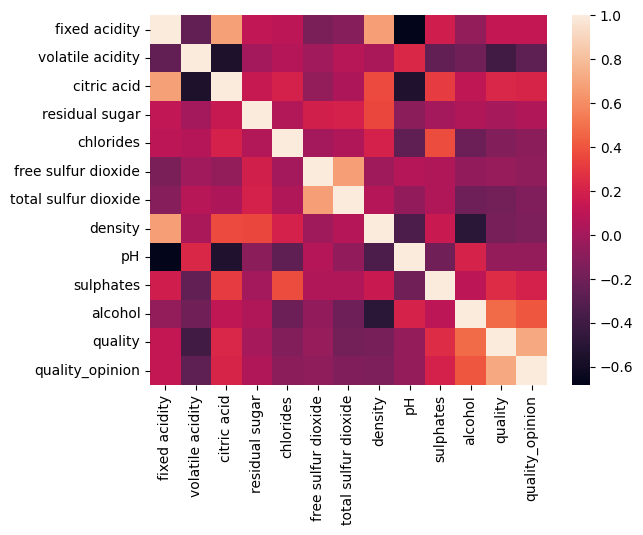

In [151]:
corr = df.corr()

sns.heatmap(corr)